In [87]:
import sys

sys.path.append("../src")

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.integrate import quad
import sto_ng

importlib.reload(sto_ng)
from sto_ng import *

3
4


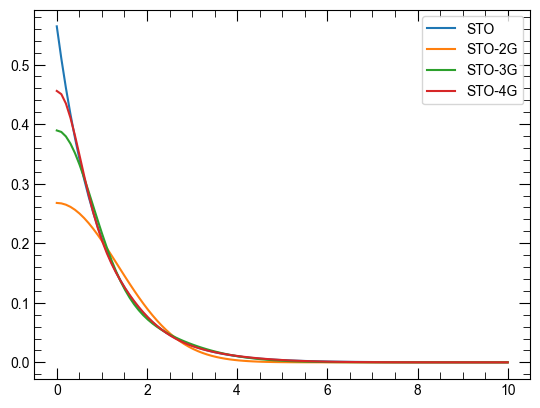

In [89]:
initial_params = np.array([1.0, 1.0, 0.5, 0.5])

fig, ax = plt.subplots()
r = np.linspace(0, 10, 100)
zeta = 1
approximator = GaussianApproximator1s(initial_params, zeta)
y = approximator.phi_1s(zeta, r)
ax.plot(r, y, label="STO")
optimized_params = approximator.optimize().x
y2 = approximator.phi_approx_g1s(optimized_params, r)
ax.plot(r, y2, label=f"STO-{2}G")
for n_gaussians in range(3, 5):
    initial_params = np.hstack((initial_params, [0.5, 0.3]))
    zeta = 1.0
    approximator = GaussianApproximator1s(initial_params, zeta)
    optimized_params = approximator.optimize().x
    y2 = approximator.phi_approx_g1s(optimized_params, r)
    ax.plot(r, y2, label=f"STO-{n_gaussians}G")
    print(len(initial_params) // 2)
ax.legend()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.009074839521829905
       x: [ 3.842e-01  4.940e-02  5.115e-01  9.746e-02  9.638e-01
            6.128e-01]
     nit: 26
     jac: [-1.797e-03  4.172e-03  2.943e-03  4.804e-03  5.595e-03
            3.259e-03]
    nfev: 194
    njev: 26


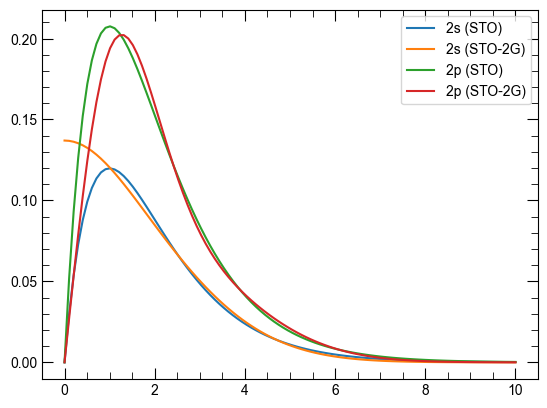

In [90]:
approximator = GaussianApproximator2s2p([0.5, 0.5, 0.9, 0.5, 0.2, 0.2], 1)
optimized_params = approximator.optimize()
print(optimized_params)
fig, ax = plt.subplots()
r = np.linspace(0, 10, 100)
y_2s = approximator.phi_2s(1, r)
y_2p = approximator.phi_2p(1, r)
y_2s_approx = approximator.phi_approx_g1s(optimized_params.x, r)
y_2p_approx = approximator.phi_approx_g2p(optimized_params.x, r)
ax.plot(r, y_2s, label="2s (STO)")
ax.plot(r, y_2s_approx, label="2s (STO-2G)")
ax.plot(r, y_2p, label="2p (STO)")
ax.plot(r, y_2p_approx, label="2p (STO-2G)")
ax.legend()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0010026503497376016
       x: [ 2.310e-01  3.996e-01  6.078e-01  7.513e-02  7.001e-01
            3.919e-01  9.942e-01 -9.997e-02  1.559e-01]
     nit: 30
     jac: [-2.526e-04  5.464e-04  3.922e-04  8.468e-04  6.469e-04
            2.315e-04 -4.527e-06  2.726e-04  2.184e-04]
    nfev: 303
    njev: 30


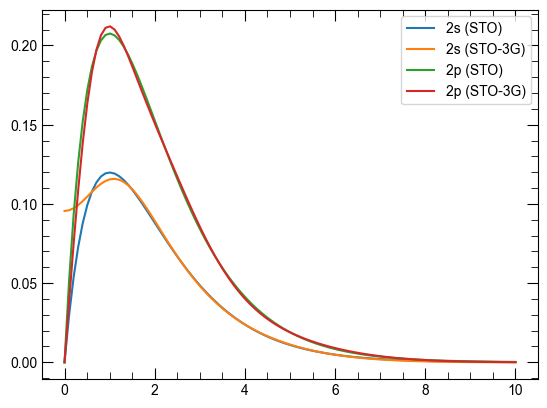

In [91]:
approximator = GaussianApproximator2s2p(
    np.hstack((optimized_params.x, [1.0, -1.0, 1.0])), 1
)
optimized_params = approximator.optimize()
print(optimized_params)
fig, ax = plt.subplots()
r = np.linspace(0, 10, 100)
y_2s = approximator.phi_2s(1, r)
y_2p = approximator.phi_2p(1, r)
y_2s_approx = approximator.phi_approx_g1s(optimized_params.x, r)
y_2p_approx = approximator.phi_approx_g2p(optimized_params.x, r)
ax.plot(r, y_2s, label="2s (STO)")
ax.plot(r, y_2s_approx, label="2s (STO-3G)")
ax.plot(r, y_2p, label="2p (STO)")
ax.plot(r, y_2p_approx, label="2p (STO-3G)")
ax.legend()